In [119]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
from obspy.imaging.beachball import beach
import bs4 as bs
import matplotlib as mpl
from matplotlib.patches import Polygon as pg
import scipy.stats

In [57]:


kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00', 'tz':'UTC', 'magnitude':7.0, 'name':'Kumamoto', 'focal_mech':[128  , 71 , -14]}
foreshock1 = {'focal_mech':[299, 79, -10], 'magnitude':6.5, 'coordinates':[130.808667, 32.741667]}
foreshock2 = {'focal_mech':[30, 77, 180], 'magnitude':6.4, 'coordinates':(130.777667, 32.700667)}

In [5]:
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

In [68]:
df_crust = df[df.depth <= 25].copy()
df_crust = df_crust[df_crust.mag >= 0.5].copy()

(<mpl_toolkits.basemap.Basemap at 0x7f420a839588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f42080e70f0>)

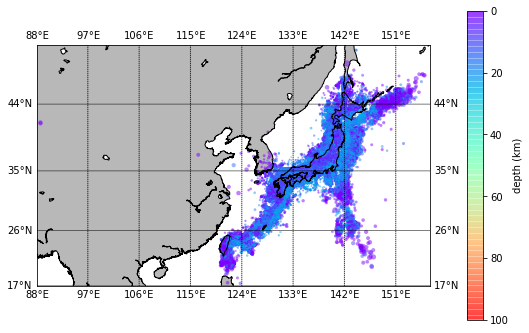

In [69]:
plotting.plot_seismicity_map(df_crust)

In [70]:
# calculate b-value for radii, timii

    
# def calc_fmd_for_params(params):
#     r, t = params
#     df_local = df_regional[df_regional.distance <= r]
#     df_local = df_local.loc[df_local.index >= t]
#     a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_local.mag)
#     return r, t, a, b, bstd, n, mc

from multiprocessing import Pool

def calc_fmd_for_params(params):
    r, t = params
    df_local = df_regional[df_regional.distance <= r]
    df_local = df_local.loc[df_local.index >= t]
    a, b, bstd, n, mc = stats.calc_fmd_stats_with_mc(df_local.mag)
    return r, t, a, b, bstd, n, mc


def calc_b_for_radii_timii_ranges(df, params):
    """
    params are always ((r1, t1), (r1, t2), ...)
    radius first, time second
    """
#     df_regional = df
    pool = Pool()
    results = pool.map(calc_fmd_for_params, params)
    pool.close()
    return results
    
    

In [95]:
# lon = 131
# lat = 32

lons = np.arange(120, 151, 1)
lats = np.arange(27, 48, 1)
lons_lats = [x for x in product(lons, lats)]

max_radius = 113
radii = np.arange(5, max_radius, 1)
timii = pd.date_range('01-01-1990', '01-01-2016', freq='6M')
params = [x for x in product(radii, timii)]
bdfs = []

for lon, lat in lons_lats:
    df_regional = polygon_selection.get_node_data(data=df_crust, node=(lon, lat), radius=max_radius+10, m=1)

    results = calc_b_for_radii_timii_ranges(df_regional, params)

    bdf = pd.DataFrame(results, columns=['r', 'start_time', 'a','b','bstd','n','mc'])
    bdf['lon'] = lon
    bdf['lat'] = lat
    bdfs.append(bdf)

bdf = pd.concat(bdfs)

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: RuntimeWarning: invalid value encountered in double_scalars
  sigma_mag = np.sum([((m - average) ** 2) / (length * (length - 1)) for m in magnitudes])
/home/max/pymap3/utilities/stats.py:48: Runti

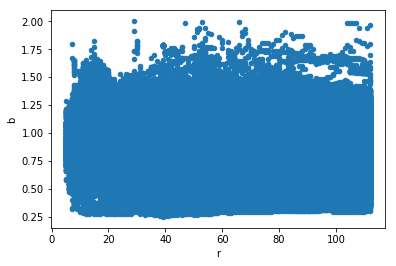

In [97]:
bdf[(bdf.b <= 2) & (bdf.n >= 50)].corr()

,r,a,b,bstd,n,mc,lon,lat
r,1.000000,0.379889,-0.129285,-0.231567,0.227253,0.146112,0.064272,0.024928
a,0.379889,1.000000,0.276160,-0.159737,0.364569,0.436140,0.074339,-0.220474
b,-0.129285,0.276160,1.000000,0.516939,-0.168047,0.082305,-0.158506,-0.204221
bstd,-0.231567,-0.159737,0.516939,1.000000,-0.400426,0.439475,0.102004,-0.019710
n,0.227253,0.364569,-0.168047,-0.400426,1.000000,-0.321654,-0.063919,-0.060133
mc,0.146112,0.436140,0.082305,0.439475,-0.321654,1.000000,0.330371,-0.049528
lon,0.064272,0.074339,-0.158506,0.102004,-0.063919,0.330371,1.000000,0.731882
lat,0.024928,-0.220474,-0.204221,-0.019710,-0.060133,-0.049528,0.731882,1.000000


In [207]:
bdf[(bdf.b <= 2) & (bdf.n >= 500)].drop_duplicates(subset=['lon','lat','b','bstd']).count()

r             433737
start_time    433737
a             433737
b             433737
bstd          433737
n             433737
mc            433737
lon           433737
lat           433737
dtype: int64

In [106]:
bdf.drop_duplicates(subset=['lon','lat','b','bstd']).count()

r             730401
start_time    730401
a             729771
b             729771
bstd          729399
n             729771
mc            729771
lon           730401
lat           730401
dtype: int64

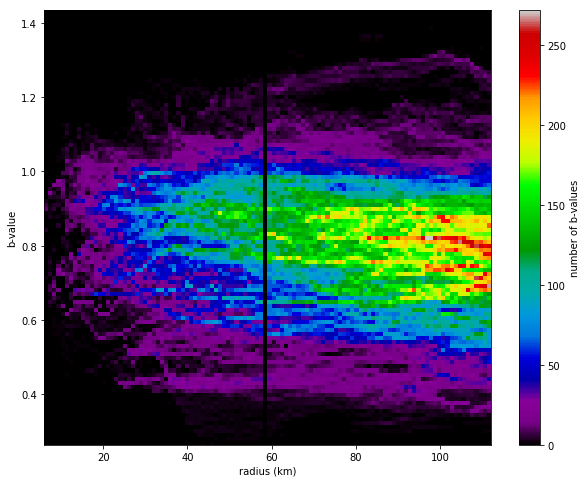

In [213]:
data = bdf[(bdf.n >= 500)].drop_duplicates(subset=['lon','lat','b','bstd'])
# data = data[(data.b <= 2) & (data.n >= 50)]
fig, ax = plt.subplots(figsize=(10, 8))
h, e1, e2, cbar = ax.hist2d(data.r, data.b, bins=radii.shape[0], cmap='nipy_spectral')
fig.colorbar(cbar, label='number of b-values')
ax.set_ylabel('b-value')
ax.set_xlabel('radius (km)')

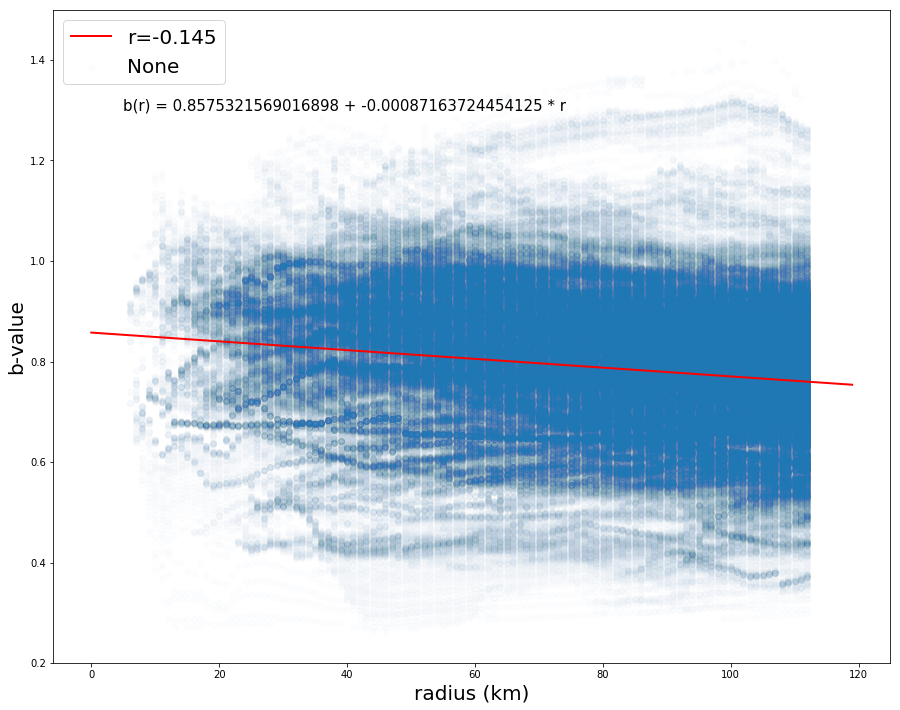

In [214]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(15, 12))
cbar = ax.scatter(x=data.r, y=data.b, alpha=0.01, label='None')
linreg = scipy.stats.linregress(data.r, data.b)
x = np.arange(0, 120, 1)
y = linreg.intercept + linreg.slope * x
ax.plot(x, y, color='red', linewidth=2, label='r={r}'.format(r=linreg.rvalue.round(3)))
ax.text(s='b(r) = {b} + {m} * r'.format(b=linreg.intercept, m=linreg.slope), x=5, y=1.3, fontsize=15)
ax.legend(fontsize=20)
ax.set_ylabel('b-value', fontsize=20)
ax.set_xlabel('radius (km)', fontsize=20)

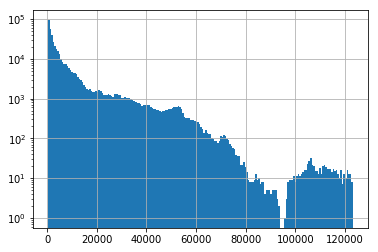

In [205]:
data.n.hist(bins=200, log=True)

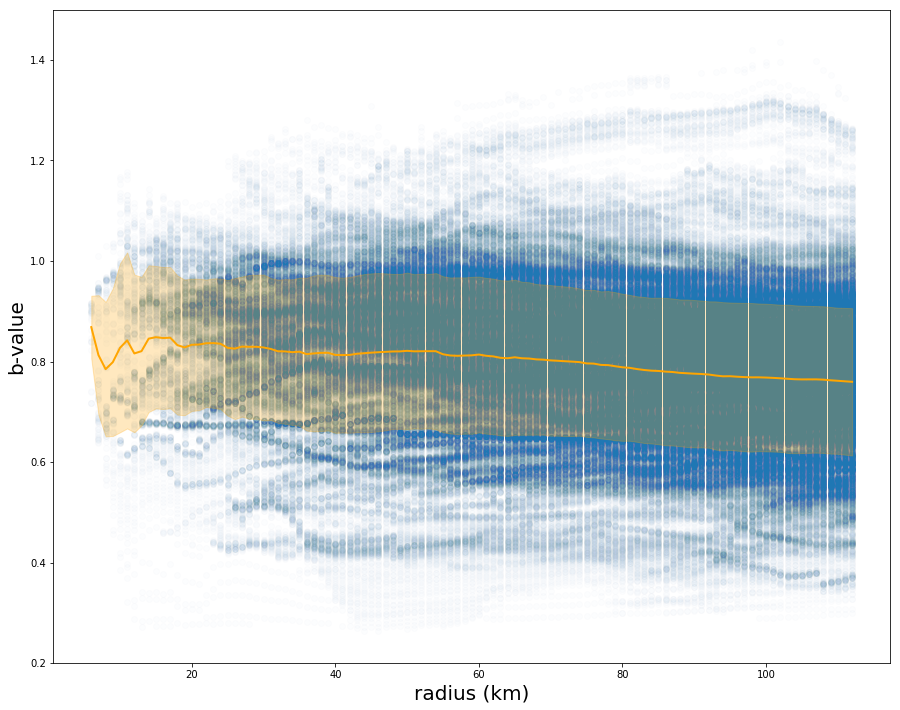

In [206]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.scatter(x=data.r, y=data.b, alpha=0.01)

x = sorted(data.r.unique())
y = data.groupby('r').b.mean()
ystd = data.groupby('r').b.std()

ax.plot(x, y, color='orange', linewidth=2)
ax.fill_between(x, y-ystd, y+ystd, color='orange', alpha=0.25)

# linreg = scipy.stats.linregress(data.r, data.b)
# x = np.arange(0, 120, 1)
# y = linreg.intercept + linreg.slope * x
# ax.plot(x, y, color='red', linewidth=2, label='r={r}'.format(r=linreg.rvalue.round(3)))
# ax.text(s='b(r) = {b} + {m} * r'.format(b=linreg.intercept, m=linreg.slope), x=5, y=1.75, fontsize=15)
# ax.legend(fontsize=20)
ax.set_ylabel('b-value', fontsize=20)
ax.set_xlabel('radius (km)', fontsize=20)

In [197]:
# data_with_std



In [123]:
avg_b = data.groupby(['lon', 'lat']).mean()
avg_b = avg_b.reset_index()

In [153]:
pearsons_R = data[].groupby(['lon', 'lat', 'r']).corr().reset_index()

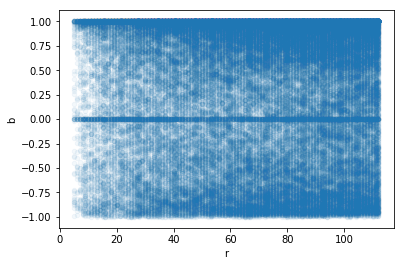

In [160]:
fig

pearsons_R.dropna()[['r', 'b']].plot(kind='scatter', x='r', y='b', alpha=0.05)

,lon,lat,r,level_3,a,b,bstd,mc,n
0,126,27,50,a,1.000000e+00,8.695250e-01,8.288805e-01,NaN,-8.032719e-01
1,126,27,50,b,8.695250e-01,1.000000e+00,9.958558e-01,NaN,-9.925123e-01
2,126,27,50,bstd,8.288805e-01,9.958558e-01,1.000000e+00,NaN,-9.980802e-01
3,126,27,50,mc,NaN,NaN,NaN,NaN,NaN
4,126,27,50,n,-8.032719e-01,-9.925123e-01,-9.980802e-01,NaN,1.000000e+00
5,126,27,51,a,1.000000e+00,7.699634e-01,7.175574e-01,NaN,-5.271974e-01
6,126,27,51,b,7.699634e-01,1.000000e+00,9.936310e-01,NaN,-9.466003e-01
7,126,27,51,bstd,7.175574e-01,9.936310e-01,1.000000e+00,NaN,-9.590612e-01
8,126,27,51,mc,NaN,NaN,NaN,NaN,NaN
9,126,27,51,n,-5.271974e-01,-9.466003e-01,-9.590612e-01,NaN,1.000000e+00


SystemError: <class 'RuntimeError'> returned a result with an error set

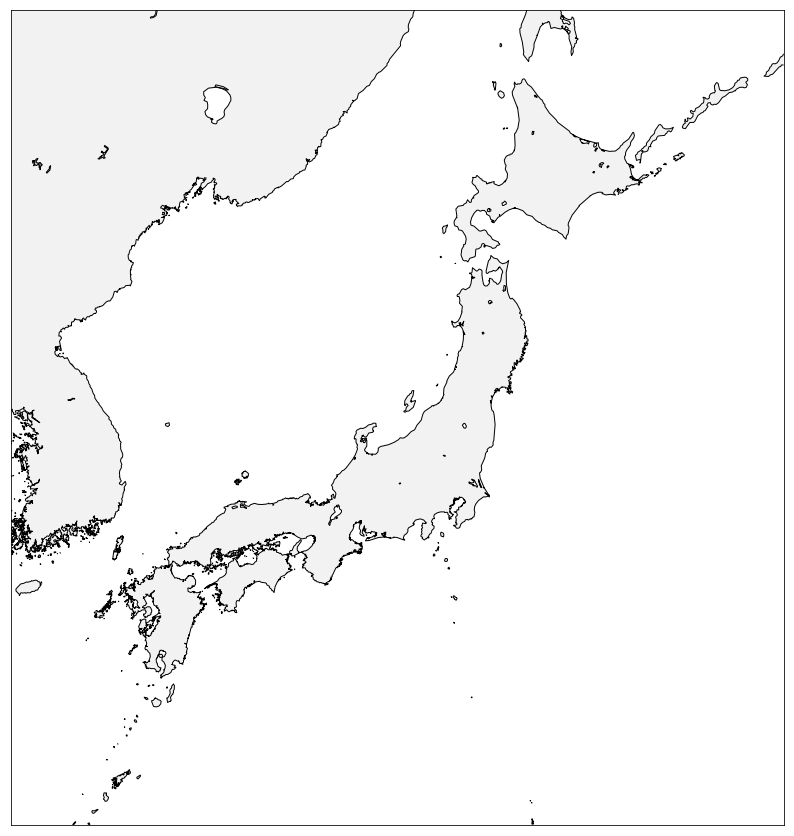

In [146]:
zi = avg_b.pivot_table(index='lat', columns='lon', values='b')
xi = zi.columns
yi = zi.index


fig, ax = plt.subplots(1, figsize=(15, 15))



m = Basemap(llcrnrlon=xi.min()
            ,llcrnrlat=yi.min()
            ,urcrnrlon=xi.max()
            ,urcrnrlat=yi.max()
#             , epsg=4269
            , projection='merc'
            , ax=ax
            , resolution='i'
            , area_thresh=1)
m.drawcoastlines()
m.fillcontinents(color='0.95', zorder=0)

xi, _ = m(xi.values, np.arange(len(xi)))
_, yi = m(np.arange(len(yi)), yi)
x, y = np.meshgrid(xi, yi)
zi = np.ma.masked_invalid(zi)
cbar = ax.pcolormesh(x, y, zi, cmap='jet', vmin=0.6, vmax=1.)
fig.colorbar(cbar)
''

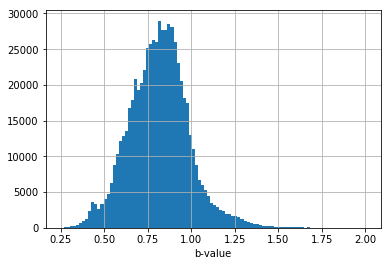

In [116]:
ax = data.b.hist(bins=100)
ax.set_xlabel('b-value')

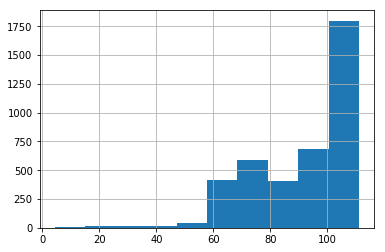

In [56]:
df_regional.distance.hist()

In [ ]:
pool = Pool()

rupture_length = 0.01 * 10 ** (0.5 * eq['magnitude'])

radii = np.arange(5, (rupture_length * 2) + 1, 1)
timii = pd.date_range(start='01-01-1980', end=eq['time'], freq='6M')
parameters = [x for x in product(radii, timii)]
results = pool.map(calc_fmd_for_params, parameters)
pool.close()

In [11]:
lons_lats = [x for x in product(lons, lats)]

In [ ]:
radii = np.arange(5, 111.111, 1)
timii = pd.date_range('01-01-1990', '01-01-2016', '12M')
params = [x for x in product(radii, timii)]


b_vals = []
for lon, lat in lons_lats:
    df_grid_node = polygon_selection.get_node_data(node=(lon, lat))

    node_b_vals = calc_b_for_radii_timii_ranges(df_grid_node, params)
    # node_b_vals => columns([lon, lat, r, t, a, b, bstd, n, mc])
    b_vals.append(node_b_vals)
    
bdf_everywhere = pd.DataFrame(b_vals, columns=[lon, lat, r, t, a, b, bstd, n, mc])
    
